# Trash Classification using Xception with Fine-Tuning

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras import layers, models
from tensorflow.keras.applications import Xception

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Dataset Path and Parameters
dataset_path = '/content/drive/MyDrive/Trash_Classification/Garbage classification'
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

In [4]:
# Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [5]:
# Xception Model Setup
base_model = Xception(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
# Compile and Train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 433s 7s/step - accuracy: 0.5402 - loss: 1.2228 - val_accuracy: 0.7097 - val_loss: 0.7659
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 274s 4s/step - accuracy: 0.7284 - loss: 0.7192 - val_accuracy: 0.7316 - val_loss: 0.7306
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 242s 4s/step - accuracy: 0.7912 - loss: 0.6035 - val_accuracy: 0.7356 - val_loss: 0.6866
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 275s 4s/step - accuracy: 0.7982 - loss: 0.5553 - val_accuracy: 0.7555 - val_loss: 0.6933
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 280s 4s/step - accuracy: 0.8122 - loss: 0.5493 - val_accuracy: 0.7256 - val_loss: 0.7201
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 274s 4s/step - accuracy: 0.8220 - loss: 0.4987 - val_accuracy: 0.7376 - val_loss: 0.7387
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 237s 4s/step - accuracy: 0.8403 - loss: 0.4358 - val_accuracy: 0.7256 - val_loss: 0.8209
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 240s 4s/step - accuracy: 0.8325 - loss: 0.4430 - val_accuracy: 0.7396 - v

In [7]:
# Fine-tune
base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])S
fine_tune_history = model.fit(train_generator, validation_data=val_generator, epochs=5)

Epoch 1/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 331s 5s/step - accuracy: 0.7488 - loss: 0.8024 - val_accuracy: 0.7575 - val_loss: 0.6994
Epoch 2/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 380s 5s/step - accuracy: 0.7811 - loss: 0.6208 - val_accuracy: 0.7455 - val_loss: 0.7077
Epoch 3/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 319s 5s/step - accuracy: 0.8091 - loss: 0.5637 - val_accuracy: 0.7396 - val_loss: 0.7050
Epoch 4/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 321s 5s/step - accuracy: 0.8396 - loss: 0.4990 - val_accuracy: 0.7495 - val_loss: 0.6542
Epoch 5/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 315s 5s/step - accuracy: 0.8410 - loss: 0.4894 - val_accuracy: 0.7515 - val_loss: 0.7042


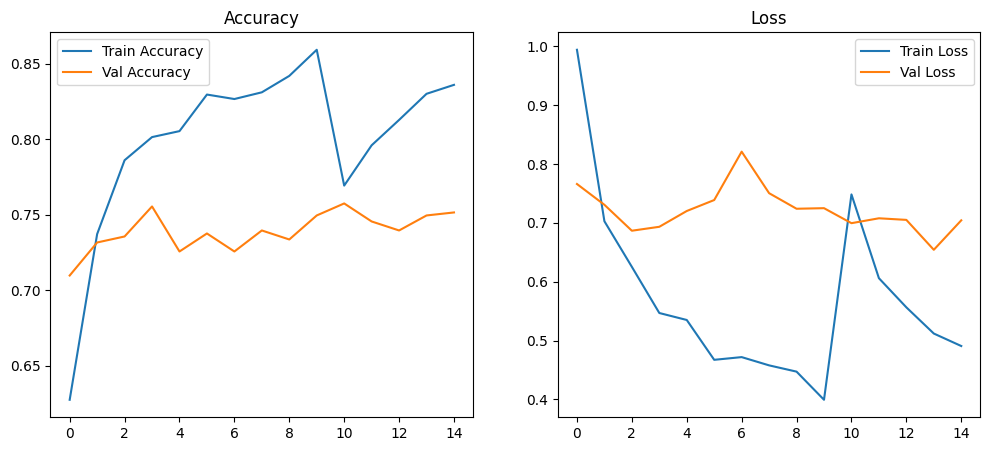

In [8]:
# Visualization
acc = history.history['accuracy'] + fine_tune_history.history['accuracy']
val_acc = history.history['val_accuracy'] + fine_tune_history.history['val_accuracy']
loss = history.history['loss'] + fine_tune_history.history['loss']
val_loss = history.history['val_loss'] + fine_tune_history.history['val_loss']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Train Accuracy')
plt.plot(val_acc, label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [10]:
# Save the model
model.save('/content/trash_classifier_xception_finetuned.h5')

In [12]:
# Path to your test image
img_path = '/content/drive/MyDrive/Trash_Classification/Test.jpg'

# Load and preprocess
img = load_img(img_path, target_size=IMG_SIZE)
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
predictions = model.predict(img_array)

# Map prediction to class label
class_indices = train_generator.class_indices
class_labels = dict((v, k) for k, v in class_indices.items())
predicted_class = class_labels[np.argmax(predictions)]
print("Predicted class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Predicted class: metal
